# Real estate apprisals

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce
import statsmodels.api as sms
from sklearn.impute import SimpleImputer
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from scipy.stats import zscore
from imblearn.over_sampling import ADASYN

## Reading/ Importing dataset

In [2]:
df = pd.read_csv('homebazzar_updated.csv')

In [3]:
df.head()

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName,propetyBuyOrRent,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,Hiranandani Group,buy,474,882,1,2022.0,10.0,appartment,10,5.0,2.5,1,1,1.23 Cr
1,0,304,1707,Ready Possession,Hiranandani Group,buy,35,1457,1,NaN,9.0,appartment,10,5.0,2.5,1,1,47.5 L
2,0,701,1092,Ready Possession,Hiranandani Group,buy,474,882,1,NaN,10.0,appartment,9,5.0,2.5,1,1,1.66 Cr
3,0,1251,1300,Ready Possession,Hiranandani Group,buy,474,882,1,2018.0,9.0,appartment,9,5.0,3.0,1,1,0
4,0,316,413,Under Construction,Hiranandani Group,buy,474,884,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,94 L


In [4]:
df.describe()

,furnishing_status,minCarpetArea,maxCarpetArea,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen
count,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1599.000000,1659.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
mean,0.077999,993.715438,1522.172673,342.619688,1464.769231,1.684777,2021.689181,5.620253,5.624529,4.095481,2.001883,0.892953,0.892953
std,0.268242,2689.331675,2973.995647,300.391161,859.910827,2.135768,3.857321,2.357745,2.340719,0.818352,1.034976,0.309256,0.309256
min,0.000000,0.000000,0.000000,5.000000,6.000000,1.000000,1997.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,410.000000,636.500000,60.000000,858.000000,1.000000,2019.000000,4.000000,4.000000,3.500000,1.500000,1.000000,1.000000
50%,0.000000,616.000000,979.000000,279.000000,1472.000000,1.000000,2023.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000
75%,0.000000,922.500000,1550.500000,474.000000,1987.000000,2.000000,2024.000000,8.000000,8.000000,5.000000,2.500000,1.000000,1.000000
max,1.000000,50150.000000,50150.000000,1277.000000,3552.000000,24.000000,2036.000000,10.000000,10.000000,5.000000,5.500000,1.000000,1.000000


## Preprossing 

#### Prices

In [5]:
df['prices'].head()

0    1.23 Cr
1     47.5 L
2    1.66 Cr
3          0
4       94 L
Name: prices, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   furnishing_status       1859 non-null   int64  
 1   minCarpetArea           1859 non-null   int64  
 2   maxCarpetArea           1859 non-null   int64  
 3   possessionStatus        1859 non-null   object 
 4   developerName           1859 non-null   object 
 5   propetyBuyOrRent        1859 non-null   object 
 6   localityId              1859 non-null   int64  
 7   sublocalityId           1859 non-null   int64  
 8   cityId                  1859 non-null   int64  
 9   possessionYear          1599 non-null   float64
 10  liveabilityIndexCount   1659 non-null   float64
 11  propertyType            1859 non-null   object 
 12  bestForInvestmentCount  1859 non-null   int64  
 13  builder_rating          1859 non-null   float64
 14  Bedroom                 1859 non-null   

In [7]:
def multiplty(text):  
  if "Cr" in text:
    text = text.replace('Cr', '')
    text = float(text)
    text = int(text*10000000)
    return text
  elif "L" in text:
    text = text.replace('L', '')
    text = float(text)
    text= int(100000*text)
    return text
  else:
    itext= int(text)
    return text

In [8]:
df['prices'] = df['prices'].apply(multiplty)

In [9]:
df['prices'] = df['prices'].astype(int)

In [10]:
df = df[df.prices != 0]

In [11]:
df.describe()

,furnishing_status,minCarpetArea,maxCarpetArea,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1444.000000,1579.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03
mean,0.055819,807.428147,1308.017815,345.284442,1471.536817,1.574822,2022.004848,5.576314,5.584917,4.092043,2.077791,0.937055,0.937055,2.272915e+07
std,0.229641,760.884397,1267.244325,302.423865,864.402517,1.877973,3.589946,2.326564,2.312340,0.810190,0.941645,0.242937,0.242937,3.639526e+07
min,0.000000,0.000000,0.000000,5.000000,6.000000,1.000000,2005.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000e+06
25%,0.000000,418.000000,642.000000,60.000000,861.000000,1.000000,2020.000000,4.000000,4.000000,3.500000,1.500000,1.000000,1.000000,6.876749e+06
50%,0.000000,615.500000,973.000000,279.000000,1506.000000,1.000000,2023.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.210000e+07
75%,0.000000,880.000000,1501.250000,474.000000,2005.250000,2.000000,2025.000000,8.000000,8.000000,5.000000,2.500000,1.000000,1.000000,2.300000e+07
max,1.000000,8383.000000,17100.000000,1277.000000,3552.000000,24.000000,2036.000000,10.000000,10.000000,5.000000,5.000000,1.000000,1.000000,3.825000e+08


#### DeveloperName

In [12]:
df['developerName'].unique().shape

(249,)

In [13]:
df['developerName'].value_counts().head(10)

Lodha Group                  105
Godrej Properties             83
Prestige Group                68
Hiranandani Group             56
Kolte Patil Developers        48
Kalpataru Group               42
Runwal Group                  37
Wadhwa Group                  33
Puravankara Builders          32
Paranjape Schemes Limited     28
Name: developerName, dtype: int64

#### Binary Encoding 

In [14]:
encoder = ce.BinaryEncoder(cols=['developerName'])
df = encoder.fit_transform(df)
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,0,0,0,0,0,0,...,1,2022.0,10.0,appartment,10,5.0,2.5,1,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,0,...,1,NaN,9.0,appartment,10,5.0,2.5,1,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,appartment,9,5.0,2.5,1,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,0,...,1,2026.0,9.0,appartment,10,5.0,2.5,1,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,appartment,9,5.0,4.5,1,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,0,...,1,NaN,NaN,commercial_office,9,5.0,0.0,0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,0,...,1,2019.0,NaN,commercial_office,9,5.0,0.0,0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,0,...,1,2023.0,8.0,appartment,10,5.0,2.5,1,1,5630000


#### liveability index count & kitchen 

<ipython-input-15-171b35939db7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),


<Axes: >

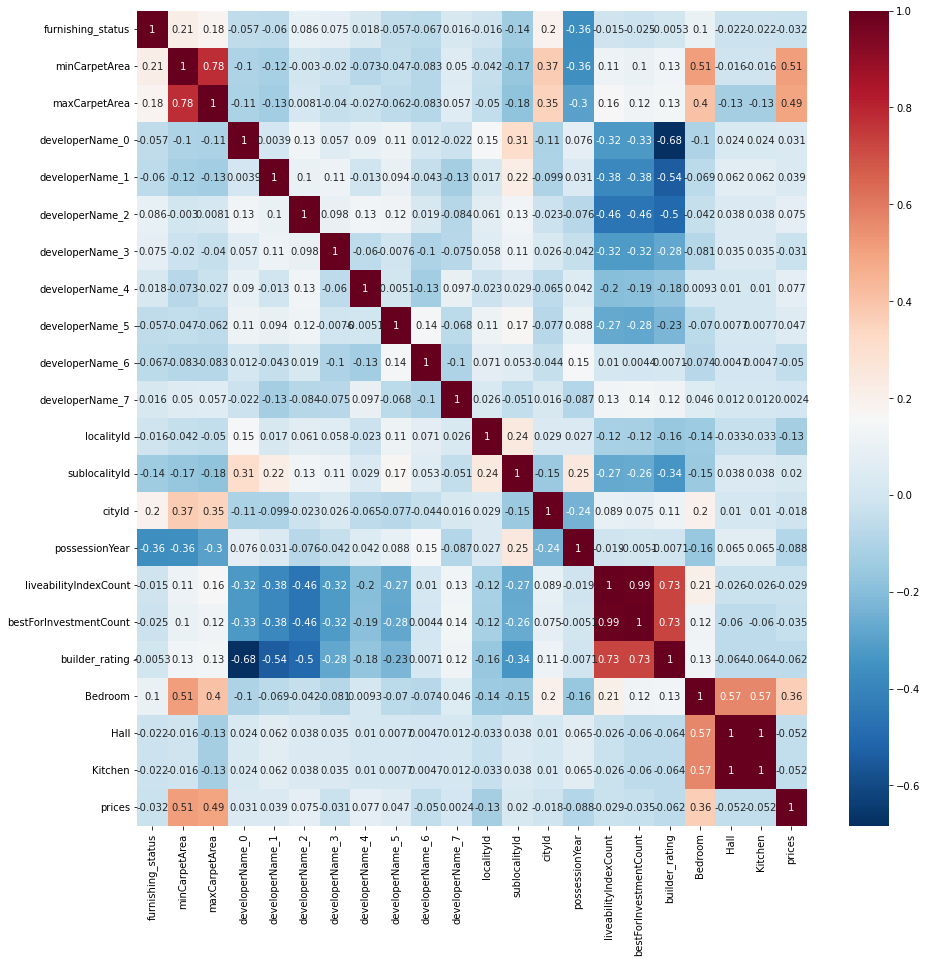

In [15]:
fig, ax = plt.subplots(figsize=(15,15))  
sb.heatmap(df.corr(), 
            cmap='RdBu_r',
            annot=True)

since high correlation hence dropping 

In [16]:
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,0,0,0,0,0,0,...,1,2022.0,10.0,appartment,10,5.0,2.5,1,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,0,...,1,NaN,9.0,appartment,10,5.0,2.5,1,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,appartment,9,5.0,2.5,1,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,0,...,1,2026.0,9.0,appartment,10,5.0,2.5,1,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,appartment,9,5.0,4.5,1,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,0,...,1,NaN,NaN,commercial_office,9,5.0,0.0,0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,0,...,1,2019.0,NaN,commercial_office,9,5.0,0.0,0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,0,...,1,2023.0,8.0,appartment,10,5.0,2.5,1,1,5630000


#### Property Type

In [17]:
df['propertyType'].unique()

array(['appartment', 'commercial_office'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
df['propertyType'] = gle.fit_transform(df['propertyType'])
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,0,0,0,0,0,0,...,1,2022.0,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,0,...,1,NaN,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,0,9,5.0,2.5,1,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,1,9,5.0,0.0,0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,0,...,1,2026.0,9.0,0,10,5.0,2.5,1,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,0,9,5.0,4.5,1,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,0,...,1,NaN,NaN,1,9,5.0,0.0,0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,0,...,1,2019.0,NaN,1,9,5.0,0.0,0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,1,9,5.0,0.0,0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,0,...,1,2023.0,8.0,0,10,5.0,2.5,1,1,5630000


#### possessionStatus

In [19]:
df['possessionStatus'].unique()

array(['Under Construction', 'Ready Possession'], dtype=object)

In [20]:
df['possessionStatus'] = gle.fit_transform(df['possessionStatus'])
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,1,0,0,0,0,0,0,...,1,2022.0,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,0,0,0,0,0,0,0,...,1,NaN,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,0,0,0,0,0,0,0,...,1,NaN,10.0,0,9,5.0,2.5,1,1,16600000
4,0,316,413,1,0,0,0,0,0,0,...,1,2024.0,NaN,1,9,5.0,0.0,0,0,9400000
6,0,566,784,1,0,0,0,0,0,0,...,1,2026.0,9.0,0,10,5.0,2.5,1,1,21000000
7,0,2200,3668,0,0,0,0,0,0,0,...,1,NaN,10.0,0,9,5.0,4.5,1,1,58600000
8,0,253,253,0,0,0,0,0,0,0,...,1,NaN,NaN,1,9,5.0,0.0,0,0,11299999
9,0,316,316,0,0,0,0,0,0,0,...,1,2019.0,NaN,1,9,5.0,0.0,0,0,9711000
10,0,316,323,1,0,0,0,0,0,0,...,1,2024.0,NaN,1,9,5.0,0.0,0,0,11600000
11,0,263,1764,1,0,0,0,0,0,0,...,1,2023.0,8.0,0,10,5.0,2.5,1,1,5630000


#### propetyBuyOrRent

In [21]:
df['propetyBuyOrRent'].unique()

array(['buy'], dtype=object)

In [22]:
df = df.drop(['propetyBuyOrRent'], axis = 1)

In [23]:
df['possessionYear'].value_counts()

2023.0    283
2024.0    218
2025.0    202
2026.0    118
2021.0    115
2019.0     92
2022.0     75
2020.0     54
2015.0     52
2018.0     51
2016.0     49
2017.0     35
2027.0     27
2014.0     24
2012.0     12
2028.0     11
2013.0     10
2010.0      5
2029.0      4
2011.0      2
2009.0      1
2005.0      1
2031.0      1
2036.0      1
2030.0      1
Name: possessionYear, dtype: int64

#### Possession year

In [24]:
df.isna().sum()

furnishing_status           0
minCarpetArea               0
maxCarpetArea               0
possessionStatus            0
developerName_0             0
developerName_1             0
developerName_2             0
developerName_3             0
developerName_4             0
developerName_5             0
developerName_6             0
developerName_7             0
localityId                  0
sublocalityId               0
cityId                      0
possessionYear            240
liveabilityIndexCount     105
propertyType                0
bestForInvestmentCount      0
builder_rating              0
Bedroom                     0
Hall                        0
Kitchen                     0
prices                      0
dtype: int64

In [25]:
# Filling the rows with the most frequent year 
df=df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df['possessionYear'].isna().sum()

0

In [26]:
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,1,0,0,0,0,0,0,...,1,2022.0,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,0,0,0,0,0,0,0,...,1,2023.0,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,0,0,0,0,0,0,0,...,1,2023.0,10.0,0,9,5.0,2.5,1,1,16600000
4,0,316,413,1,0,0,0,0,0,0,...,1,2024.0,4.0,1,9,5.0,0.0,0,0,9400000
6,0,566,784,1,0,0,0,0,0,0,...,1,2026.0,9.0,0,10,5.0,2.5,1,1,21000000
7,0,2200,3668,0,0,0,0,0,0,0,...,1,2023.0,10.0,0,9,5.0,4.5,1,1,58600000
8,0,253,253,0,0,0,0,0,0,0,...,1,2023.0,4.0,1,9,5.0,0.0,0,0,11299999
9,0,316,316,0,0,0,0,0,0,0,...,1,2019.0,4.0,1,9,5.0,0.0,0,0,9711000
10,0,316,323,1,0,0,0,0,0,0,...,1,2024.0,4.0,1,9,5.0,0.0,0,0,11600000
11,0,263,1764,1,0,0,0,0,0,0,...,1,2023.0,8.0,0,10,5.0,2.5,1,1,5630000


In [27]:
X = df.drop(['localityId','sublocalityId'], axis=1)

In [28]:
df1=df.copy()

In [29]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [30]:
X

array([[4.710e+02, 2.342e+03, 1.000e+00, ..., 2.500e+00, 1.000e+00,
        1.000e+00],
       [3.040e+02, 1.707e+03, 0.000e+00, ..., 2.500e+00, 1.000e+00,
        1.000e+00],
       [7.010e+02, 1.092e+03, 0.000e+00, ..., 2.500e+00, 1.000e+00,
        1.000e+00],
       ...,
       [4.150e+02, 7.700e+02, 1.000e+00, ..., 1.500e+00, 1.000e+00,
        1.000e+00],
       [4.130e+02, 5.480e+02, 0.000e+00, ..., 1.500e+00, 1.000e+00,
        1.000e+00],
       [4.570e+02, 8.560e+02, 0.000e+00, ..., 2.500e+00, 1.000e+00,
        1.000e+00]])

In [31]:
y

array([[12300000],
       [ 4750000],
       [16600000],
       ...,
       [21400000],
       [ 5500000],
       [40000000]])

## Feature selection

### SelectKBest

In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

# X is the input features and y is the target variable
selector = SelectKBest(score_func=f_regression, k=7) # Select the top 5 features
X_new = selector.fit_transform(X, y)

# Print the selected feature indices
print("Selected feature indices:",selector.get_support(indices=True))

Selected feature indices: [ 0  1  2  7 11 14 19]


/Users/parthmody/anaconda3/envs/DL_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Recursive Feature Elimination

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# X is the input features and y is the target variable
estimator = LinearRegression() # Use linear regression as the estimator
selector = RFE(estimator, n_features_to_select=7, step=1) # Select the top 5 features
selector = selector.fit(X, y)

# Print the selected feature indices
print("Selected feature indices:",selector.get_support(indices=True))

Selected feature indices: [ 3  4  5 16 19 20 21]


### Lasso

In [34]:
from sklearn.linear_model import Lasso
import numpy as np

# Define the regularization parameter
alpha = 0.05

# Create and fit the Lasso regression model
lasso = Lasso(alpha=alpha)
lasso.fit(X, y)

# Get the coefficients and non-zero feature indices
coefficients = lasso.coef_
selected_feature_indices = np.where(coefficients != 0)[0]

# Print the indices of the selected features
print("Selected feature indices:", selected_feature_indices)

Selected feature indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [35]:
df_1=df.copy()

In [36]:
df_1 = df_1.drop(['possessionStatus','developerName_0','developerName_1','developerName_2','developerName_3','developerName_4','developerName_5','localityId','sublocalityId','possessionYear','propertyType','bestForInvestmentCount','Bedroom','Hall'], axis = 1)

In [37]:
df_1

,furnishing_status,minCarpetArea,maxCarpetArea,developerName_6,developerName_7,cityId,liveabilityIndexCount,builder_rating,Kitchen,prices
0,0,471,2342,0,1,1,10.0,5.0,1,12300000
1,0,304,1707,0,1,1,9.0,5.0,1,4750000
2,0,701,1092,0,1,1,10.0,5.0,1,16600000
4,0,316,413,0,1,1,4.0,5.0,0,9400000
6,0,566,784,0,1,1,9.0,5.0,1,21000000
...,...,...,...,...,...,...,...,...,...,...
1850,0,754,1120,0,1,1,4.0,2.5,1,22300000
1852,0,698,895,1,0,2,4.0,2.0,1,9039000
1854,0,415,770,1,1,1,4.0,2.0,1,21400000
1856,0,413,548,0,0,1,4.0,2.0,1,5500000


In [38]:
X=df_1.iloc[:,:-1].values
y=df_1.iloc[:,-1].values.reshape(-1,1)

In [39]:
# X

In [40]:
# X=df.iloc[:,:-1].values
# y=df.iloc[:,-1].values.reshape(-1,1)

In [41]:
X

array([[0.000e+00, 4.710e+02, 2.342e+03, ..., 1.000e+01, 5.000e+00,
        1.000e+00],
       [0.000e+00, 3.040e+02, 1.707e+03, ..., 9.000e+00, 5.000e+00,
        1.000e+00],
       [0.000e+00, 7.010e+02, 1.092e+03, ..., 1.000e+01, 5.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 4.150e+02, 7.700e+02, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [0.000e+00, 4.130e+02, 5.480e+02, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [0.000e+00, 4.570e+02, 8.560e+02, ..., 4.000e+00, 2.000e+00,
        1.000e+00]])

In [42]:
df_2=df.copy()

In [43]:
df_2 = df_2.drop(['possessionStatus','developerName_0','developerName_1','developerName_2','developerName_3','developerName_4','developerName_5','developerName_6','developerName_7','localityId','cityId','sublocalityId','possessionYear'], axis = 1)

In [44]:
df_2.head()

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,10.0,0,9,5.0,2.5,1,1,16600000
4,0,316,413,4.0,1,9,5.0,0.0,0,0,9400000
6,0,566,784,9.0,0,10,5.0,2.5,1,1,21000000


In [45]:
cat_cols = ['furnishing_status','propertyType','Hall','Kitchen'] # categorical variables
con_cols = ['minCarpetArea','maxCarpetArea','bestForInvestmentCount','builder_rating','Bedroom'] # continuous variables
target_col = ['price'] # target / dependant variable

## Exploratory data analysis (EDA)

### Correlation Matrix

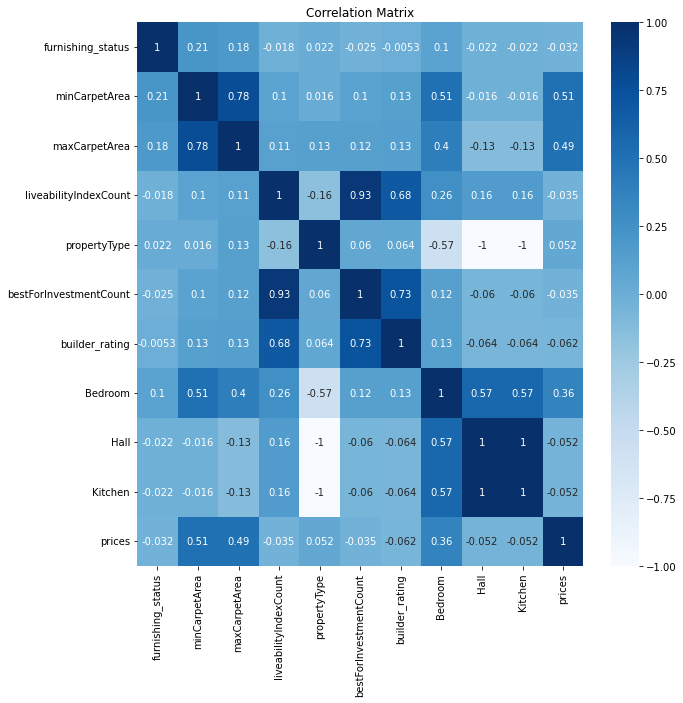

In [46]:
plt.figure(figsize=(10,10))
heatmap = sb.heatmap(df_2.corr(), cmap="Blues", annot=True)
heatmap.set_title("Correlation Matrix")
plt.show()

### Histogram

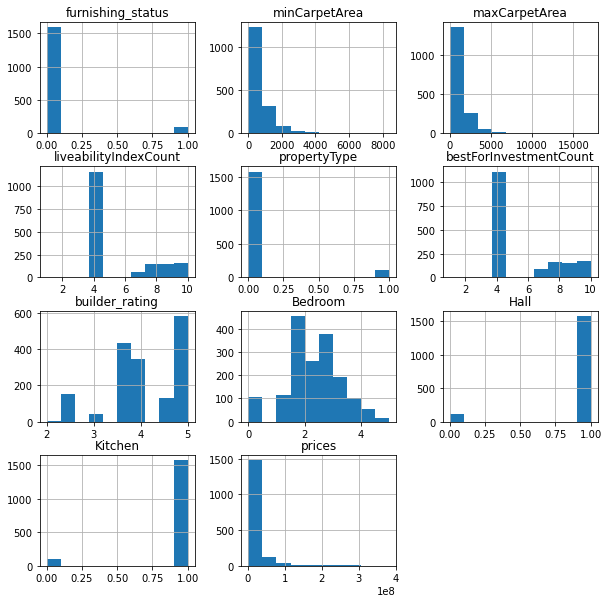

In [47]:
p = df_2.hist(figsize = (10,10))

### Boxplot for continuous features

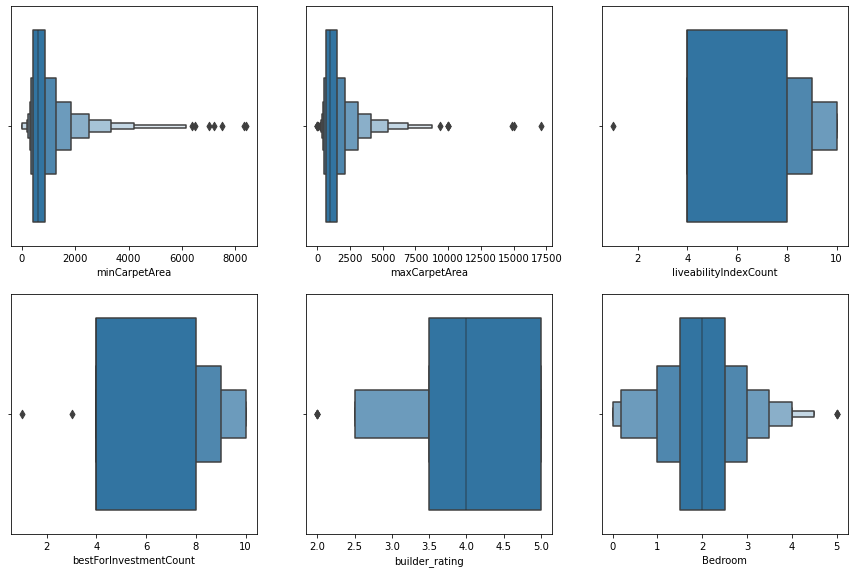

In [48]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sb.boxenplot(x=df_2['minCarpetArea'])

plt.subplot(3, 3, 2)
sb.boxenplot(x=df_2['maxCarpetArea'])

plt.subplot(3, 3, 3)
sb.boxenplot(x=df_2['liveabilityIndexCount'])

plt.subplot(3, 3, 4)
sb.boxenplot(x=df_2['bestForInvestmentCount'])

plt.subplot(3, 3, 5)
sb.boxenplot(x=df_2['builder_rating'])

plt.subplot(3, 3, 6)
sb.boxenplot(x=df_2['Bedroom'])

plt.show()

In [49]:
df_con = df_2[con_cols].corr().transpose()
df_con

,minCarpetArea,maxCarpetArea,bestForInvestmentCount,builder_rating,Bedroom
minCarpetArea,1.000000,0.779634,0.101801,0.126258,0.507572
maxCarpetArea,0.779634,1.000000,0.124508,0.134569,0.403269
bestForInvestmentCount,0.101801,0.124508,1.000000,0.725926,0.120990
builder_rating,0.126258,0.134569,0.725926,1.000000,0.127488
Bedroom,0.507572,0.403269,0.120990,0.127488,1.000000


### Countplot for discrete features

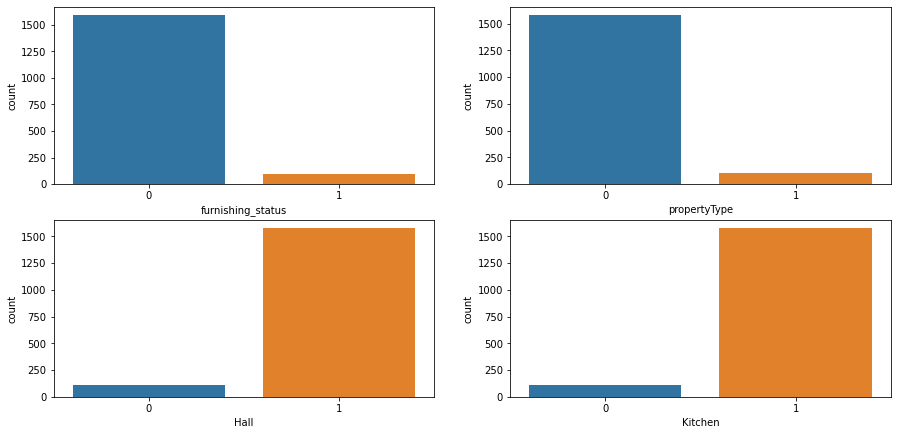

In [50]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 2, 1)
sb.countplot(data=df_2, x='furnishing_status')

plt.subplot(4, 2, 2)
sb.countplot(data=df_2, x='propertyType')

plt.subplot(4, 2, 3)
sb.countplot(data=df_2, x='Hall')

plt.subplot(4, 2, 4)
sb.countplot(data=df_2, x='Kitchen')

plt.show()

In [51]:
df_cat = df_2[cat_cols].corr().transpose()
df_cat

,furnishing_status,propertyType,Hall,Kitchen
furnishing_status,1.000000,0.022187,-0.022187,-0.022187
propertyType,0.022187,1.000000,-1.000000,-1.000000
Hall,-0.022187,-1.000000,1.000000,1.000000
Kitchen,-0.022187,-1.000000,1.000000,1.000000


In [52]:
df_2

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,10.0,0,9,5.0,2.5,1,1,16600000
4,0,316,413,4.0,1,9,5.0,0.0,0,0,9400000
6,0,566,784,9.0,0,10,5.0,2.5,1,1,21000000
...,...,...,...,...,...,...,...,...,...,...,...
1850,0,754,1120,4.0,0,4,2.5,2.5,1,1,22300000
1852,0,698,895,4.0,0,4,2.0,2.5,1,1,9039000
1854,0,415,770,4.0,0,4,2.0,1.5,1,1,21400000
1856,0,413,548,4.0,0,4,2.0,1.5,1,1,5500000


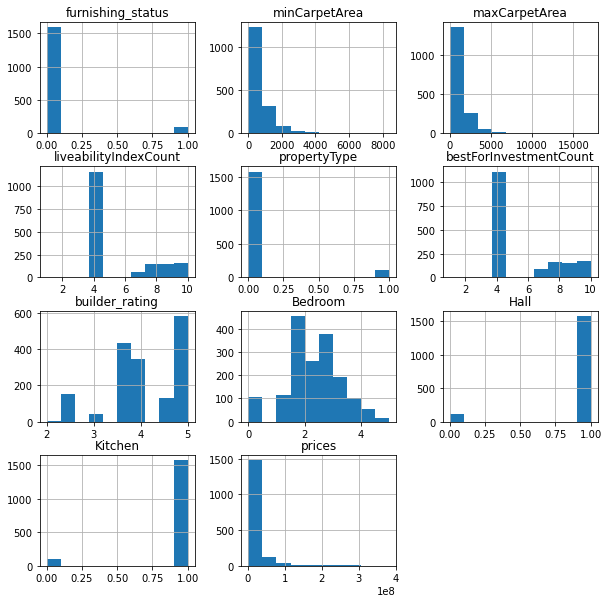

In [53]:
p = df_2.hist(figsize = (10,10))

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
XD=df_2.iloc[:,:-1].values
yD=df_2.iloc[:,-1].values

In [56]:
XD

array([[0.000e+00, 4.710e+02, 2.342e+03, ..., 2.500e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 3.040e+02, 1.707e+03, ..., 2.500e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 7.010e+02, 1.092e+03, ..., 2.500e+00, 1.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 4.150e+02, 7.700e+02, ..., 1.500e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 4.130e+02, 5.480e+02, ..., 1.500e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 4.570e+02, 8.560e+02, ..., 2.500e+00, 1.000e+00,
        1.000e+00]])

In [57]:
yD

array([12300000,  4750000, 16600000, ..., 21400000,  5500000, 40000000])

In [58]:
from sklearn.model_selection import train_test_split
XD_train,XD_test,yD_train,yD_test=train_test_split(XD,yD,test_size=0.2,random_state=0)

In [59]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = df_2[df_2['furnishing_status'] == 0]
minority_class = df_2[df_2['furnishing_status'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
upsampled_data = pd.concat([majority_class, upsampled_minority])

In [60]:
upsampled_data

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,10.0,0,9,5.0,2.5,1,1,16600000
4,0,316,413,4.0,1,9,5.0,0.0,0,0,9400000
6,0,566,784,9.0,0,10,5.0,2.5,1,1,21000000
...,...,...,...,...,...,...,...,...,...,...,...
1763,1,1250,1450,4.0,0,4,2.5,2.5,1,1,25400000
1023,1,1095,2104,4.0,0,4,4.0,2.5,1,1,8416000
992,1,445,702,4.0,0,4,4.0,1.5,1,1,1576000
1224,1,570,570,4.0,1,4,3.5,0.0,0,0,9724000


In [61]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class1 = df_2[df_2['propertyType'] == 0]
minority_class1 = df_2[df_2['propertyType'] == 1]

# Upsample the minority class
upsampled_minority1 = resample(minority_class1, replace=True, n_samples=len(majority_class1), random_state=42)

# Combine the upsampled minority class with the majority class
upsampled_data1 = pd.concat([majority_class1, upsampled_minority1])

In [62]:
upsampled_data1

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,10.0,0,9,5.0,2.5,1,1,16600000
6,0,566,784,9.0,0,10,5.0,2.5,1,1,21000000
7,0,2200,3668,10.0,0,9,5.0,4.5,1,1,58600000
...,...,...,...,...,...,...,...,...,...,...,...
566,1,1250,2000,4.0,1,10,5.0,0.0,0,0,9500000
892,0,8383,15036,4.0,1,4,4.0,0.0,0,0,293400000
8,0,253,253,4.0,1,9,5.0,0.0,0,0,11299999
686,0,170,1540,4.0,1,8,4.5,0.0,0,0,5610000


In [63]:
# class_counts = np.bincount(y)
# majority_class = np.argmax(class_counts)
# minority_class = np.argmin(class_counts)

# # Apply ADASYN to generate synthetic samples
# adasyn = ADASYN(random_state=42)
# new_X, new_y = adasyn.fit_resample(X, y)

# # Check the class distribution after applying ADASYN
# new_class_counts = np.bincount(new_y)
# print("Class distribution after applying ADASYN:")
# print(f"Class {majority_class}: {new_class_counts[majority_class]} samples")
# print(f"Class {minority_class}: {new_class_counts[minority_class]} samples")

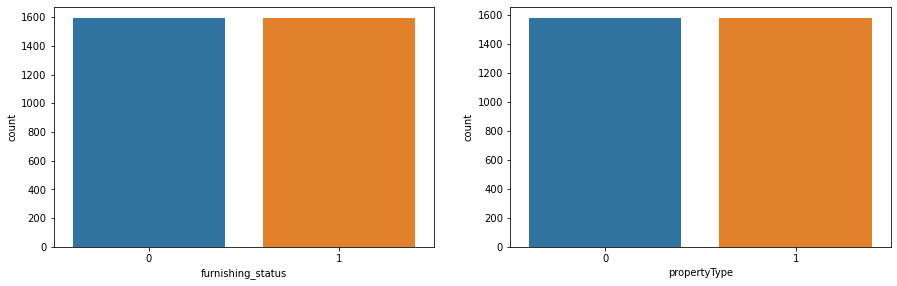

In [64]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sb.countplot(data=upsampled_data, x='furnishing_status')

plt.subplot(3, 2, 2)
sb.countplot(data=upsampled_data1, x='propertyType')

plt.show()

In [65]:
# Assuming df1 and df2 are your two DataFrames
df_2 = pd.merge(upsampled_data, upsampled_data1)

In [66]:
df_2

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,10.0,0,10,5.0,2.5,1,1,12300000
1,0,304,1707,9.0,0,10,5.0,2.5,1,1,4750000
2,0,701,1092,10.0,0,9,5.0,2.5,1,1,16600000
3,0,316,413,4.0,1,9,5.0,0.0,0,0,9400000
4,0,316,413,4.0,1,9,5.0,0.0,0,0,9400000
...,...,...,...,...,...,...,...,...,...,...,...
6050,1,1218,2439,10.0,0,10,5.0,3.0,1,1,7917000
6051,1,1218,2439,10.0,0,10,5.0,3.0,1,1,7917000
6052,1,1218,2439,10.0,0,10,5.0,3.0,1,1,7917000
6053,1,1218,2439,10.0,0,10,5.0,3.0,1,1,7917000


In [67]:
XD_train

array([[0.000e+00, 3.000e+03, 3.000e+03, ..., 3.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 6.680e+02, 6.680e+02, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 4.450e+02, 5.820e+02, ..., 1.500e+00, 1.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 3.200e+02, 5.200e+02, ..., 1.500e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 4.100e+02, 4.100e+02, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [0.000e+00, 6.590e+02, 1.031e+03, ..., 2.500e+00, 1.000e+00,
        1.000e+00]])

In [68]:
yD_train

array([30000000, 23300000,  3800000, ...,  5572000, 14800000, 21900000])

In [69]:
X1=df[['minCarpetArea']]
y1=df['prices']

In [70]:
X1

,minCarpetArea
0,471
1,304
2,701
4,316
6,566
...,...
1850,754
1852,698
1854,415
1856,413


In [71]:
y1

0       12300000
1        4750000
2       16600000
4        9400000
6       21000000
          ...   
1850    22300000
1852     9039000
1854    21400000
1856     5500000
1857    40000000
Name: prices, Length: 1684, dtype: int64

In [72]:
X2=df[['maxCarpetArea']]
y2=df['prices']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
X_train

array([[0.000e+00, 3.000e+03, 3.000e+03, ..., 9.000e+00, 5.000e+00,
        1.000e+00],
       [1.000e+00, 6.680e+02, 6.680e+02, ..., 4.000e+00, 4.000e+00,
        1.000e+00],
       [0.000e+00, 4.450e+02, 5.820e+02, ..., 8.000e+00, 5.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 3.200e+02, 5.200e+02, ..., 4.000e+00, 2.500e+00,
        1.000e+00],
       [0.000e+00, 4.100e+02, 4.100e+02, ..., 8.000e+00, 5.000e+00,
        1.000e+00],
       [0.000e+00, 6.590e+02, 1.031e+03, ..., 4.000e+00, 4.500e+00,
        1.000e+00]])

In [75]:
y_train

array([[30000000],
       [23300000],
       [ 3800000],
       ...,
       [ 5572000],
       [14800000],
       [21900000]])

In [76]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 1/3, random_state = 0)

In [77]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 1/3, random_state = 0)

## Feature Scaling

In [78]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# XD_train[:, 1:3]=sc.fit_transform(XD_train[:,1:3])
# XD_test[:, 1:3]=sc.transform(XD_test[:, 1:3])

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:, 1:3]=sc.fit_transform(X_train[:,1:3])
X_test[:, 1:3]=sc.transform(X_test[:, 1:3])

# X_train[:, 13:19]=sc.fit_transform(X_train[:,13:19])
# X_test[:, 13:19]=sc.transform(X_test[:, 13:19])

In [80]:
X_train

array([[ 0.        ,  2.7642133 ,  1.36648634, ...,  9.        ,
         5.        ,  1.        ],
       [ 1.        , -0.18385918, -0.51206399, ...,  4.        ,
         4.        ,  1.        ],
       [ 0.        , -0.46577177, -0.58134157, ...,  8.        ,
         5.        ,  1.        ],
       ...,
       [ 0.        , -0.62379453, -0.63128588, ...,  4.        ,
         2.5       ,  1.        ],
       [ 0.        , -0.51001814, -0.71989674, ...,  8.        ,
         5.        ,  1.        ],
       [ 0.        , -0.19523682, -0.21964813, ...,  4.        ,
         4.5       ,  1.        ]])

## Data Augmentation

### Adding Gaussian noise to original data

In [81]:
std_dev = 0.1
noisy_data = df_2 + np.random.normal(loc=0, scale=std_dev, size=df_2.shape)

# Print the first few samples of the original and noisy data
print("Original data:")
print(df_2[:5])

print("/======================================================================================/")

print("\nNoisy data:",noisy_data)
print(df_2[:5])

Original data:
   furnishing_status  minCarpetArea  maxCarpetArea  liveabilityIndexCount  \
0                  0            471           2342                   10.0   
1                  0            304           1707                    9.0   
2                  0            701           1092                   10.0   
3                  0            316            413                    4.0   
4                  0            316            413                    4.0   

   propertyType  bestForInvestmentCount  builder_rating  Bedroom  Hall  \
0             0                      10             5.0      2.5     1   
1             0                      10             5.0      2.5     1   
2             0                       9             5.0      2.5     1   
3             1                       9             5.0      0.0     0   
4             1                       9             5.0      0.0     0   

   Kitchen    prices  
0        1  12300000  
1        1   4750000  
2       

### Concating the noisy data with original data

In [82]:
combined_df2 = pd.concat([df_2, noisy_data], ignore_index=True)

In [83]:
combined_df2

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0.000000,471.000000,2342.000000,10.000000,0.000000,10.000000,5.000000,2.500000,1.000000,1.000000,1.230000e+07
1,0.000000,304.000000,1707.000000,9.000000,0.000000,10.000000,5.000000,2.500000,1.000000,1.000000,4.750000e+06
2,0.000000,701.000000,1092.000000,10.000000,0.000000,9.000000,5.000000,2.500000,1.000000,1.000000,1.660000e+07
3,0.000000,316.000000,413.000000,4.000000,1.000000,9.000000,5.000000,0.000000,0.000000,0.000000,9.400000e+06
4,0.000000,316.000000,413.000000,4.000000,1.000000,9.000000,5.000000,0.000000,0.000000,0.000000,9.400000e+06
...,...,...,...,...,...,...,...,...,...,...,...
12105,0.994019,1218.006436,2438.948547,9.863629,0.065456,10.029623,5.074360,3.130662,1.059350,1.015199,7.917000e+06
12106,0.927173,1217.862355,2439.031503,9.905372,-0.078273,9.976479,5.140294,2.880866,1.169892,1.029741,7.917000e+06
12107,0.973505,1218.041000,2438.963729,9.839644,-0.053224,9.834956,5.037016,2.850179,0.976521,0.909770,7.917000e+06
12108,0.940901,1217.856262,2439.079993,9.910057,-0.186196,10.089337,4.908047,2.964354,1.097203,1.086676,7.917000e+06


### Working on noisy data

In [84]:
lgd= np.log(combined_df2)

/Users/parthmody/anaconda3/envs/DL_env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/parthmody/anaconda3/envs/DL_env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [85]:
lgd.shape

(12110, 11)

In [86]:
lgd

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,-inf,6.154858,7.758761,2.302585,-inf,2.302585,1.609438,0.916291,0.000000,0.000000,16.325110
1,-inf,5.717028,7.442493,2.197225,-inf,2.302585,1.609438,0.916291,0.000000,0.000000,15.373655
2,-inf,6.552508,6.995766,2.302585,-inf,2.197225,1.609438,0.916291,0.000000,0.000000,16.624913
3,-inf,5.755742,6.023448,1.386294,0.000000,2.197225,1.609438,-inf,-inf,-inf,16.056220
4,-inf,5.755742,6.023448,1.386294,0.000000,2.197225,1.609438,-inf,-inf,-inf,16.056220
...,...,...,...,...,...,...,...,...,...,...,...
12105,-0.005999,7.104971,7.799322,2.288854,-2.726379,2.305543,1.624200,1.141244,0.057656,0.015084,15.884523
12106,-0.075615,7.104852,7.799356,2.293077,NaN,2.300230,1.637110,1.058091,0.156911,0.029307,15.884523
12107,-0.026852,7.104999,7.799329,2.286420,NaN,2.285943,1.616814,1.047382,-0.023759,-0.094564,15.884523
12108,-0.060917,7.104847,7.799376,2.293550,NaN,2.311479,1.590876,1.086659,0.092764,0.083123,15.884523


In [87]:
lgd[np.isneginf(lgd)] = np.nan

In [88]:
transformed_data = np.sqrt(np.log(lgd))

/Users/parthmody/anaconda3/envs/DL_env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/parthmody/anaconda3/envs/DL_env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/parthmody/anaconda3/envs/DL_env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [89]:
transformed_data.shape

(12110, 11)

In [90]:
transformed_data

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,NaN,1.348051,1.431371,0.913254,NaN,0.913254,0.689844,NaN,NaN,NaN,1.671139
1,NaN,1.320397,1.416759,0.887240,NaN,0.913254,0.689844,NaN,NaN,NaN,1.653075
2,NaN,1.371075,1.394742,0.913254,NaN,0.887240,0.689844,NaN,NaN,NaN,1.676575
3,NaN,1.322950,1.340022,0.571519,NaN,0.887240,0.689844,NaN,NaN,NaN,1.666162
4,NaN,1.322950,1.340022,0.571519,NaN,0.887240,0.689844,NaN,NaN,NaN,1.666162
...,...,...,...,...,...,...,...,...,...,...,...
12105,NaN,1.400284,1.433191,0.909973,NaN,0.913956,0.696431,0.363482,NaN,NaN,1.662933
12106,NaN,1.400278,1.433193,0.910986,NaN,0.912693,0.702092,0.237626,NaN,NaN,1.662933
12107,NaN,1.400285,1.433191,0.909388,NaN,0.909274,0.693150,0.215160,NaN,NaN,1.662933
12108,NaN,1.400278,1.433194,0.911099,NaN,0.915362,0.681385,0.288285,NaN,NaN,1.662933


### Distribution between noisy data and transformed noisy data

#### Noisy data

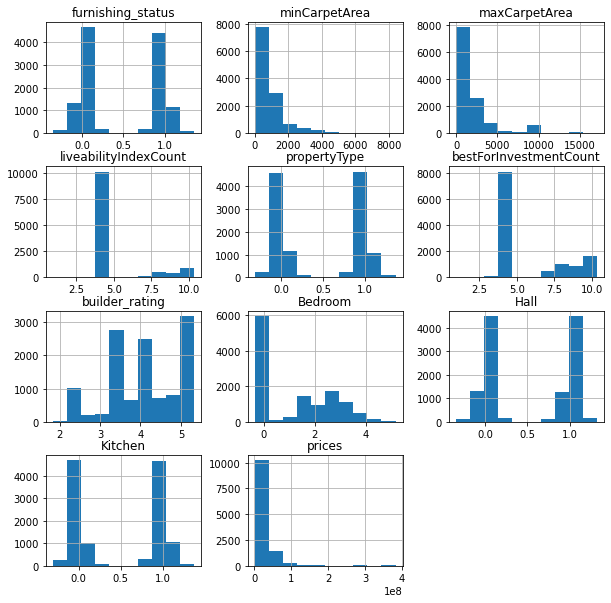

In [91]:
p = combined_df2.hist(figsize = (10,10))

#### Transformed noisy data

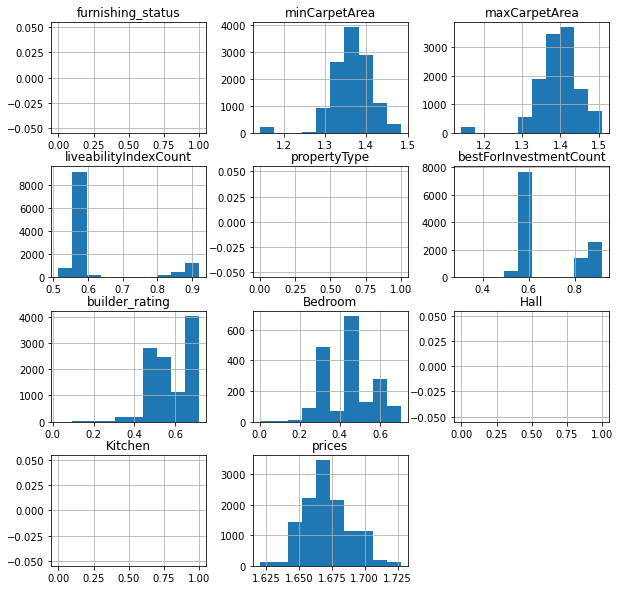

In [92]:
p = transformed_data.hist(figsize = (10,10))

### Working on transformed noisy data

In [93]:
transformed_data

,furnishing_status,minCarpetArea,maxCarpetArea,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,NaN,1.348051,1.431371,0.913254,NaN,0.913254,0.689844,NaN,NaN,NaN,1.671139
1,NaN,1.320397,1.416759,0.887240,NaN,0.913254,0.689844,NaN,NaN,NaN,1.653075
2,NaN,1.371075,1.394742,0.913254,NaN,0.887240,0.689844,NaN,NaN,NaN,1.676575
3,NaN,1.322950,1.340022,0.571519,NaN,0.887240,0.689844,NaN,NaN,NaN,1.666162
4,NaN,1.322950,1.340022,0.571519,NaN,0.887240,0.689844,NaN,NaN,NaN,1.666162
...,...,...,...,...,...,...,...,...,...,...,...
12105,NaN,1.400284,1.433191,0.909973,NaN,0.913956,0.696431,0.363482,NaN,NaN,1.662933
12106,NaN,1.400278,1.433193,0.910986,NaN,0.912693,0.702092,0.237626,NaN,NaN,1.662933
12107,NaN,1.400285,1.433191,0.909388,NaN,0.909274,0.693150,0.215160,NaN,NaN,1.662933
12108,NaN,1.400278,1.433194,0.911099,NaN,0.915362,0.681385,0.288285,NaN,NaN,1.662933


In [94]:
transformed_data = transformed_data.drop(['furnishing_status','propertyType','Hall','Kitchen'], axis = 1)

In [95]:
transformed_data.shape

(12110, 7)

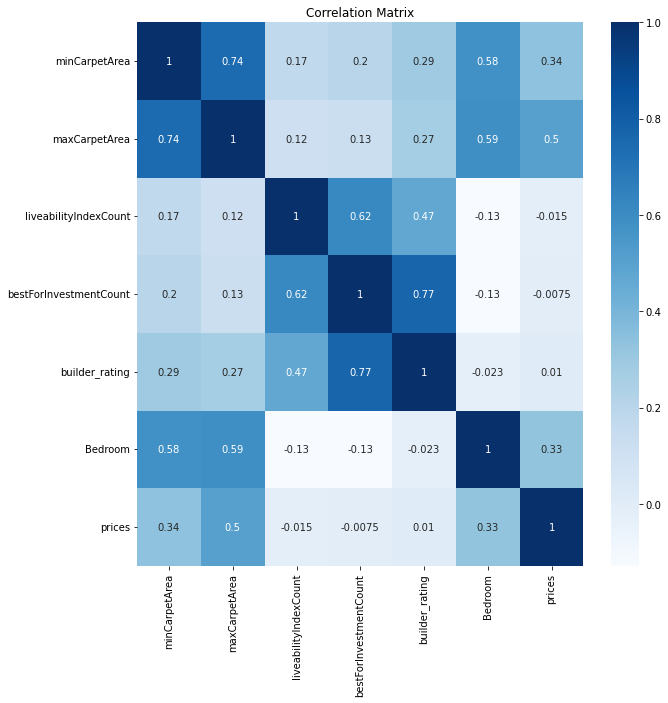

In [96]:
plt.figure(figsize=(10,10))
heatmap = sb.heatmap(transformed_data.corr(), cmap="Blues", annot=True)
heatmap.set_title("Correlation Matrix")
plt.show()

In [97]:
transformed_data.isnull().sum()

minCarpetArea                30
maxCarpetArea                 6
liveabilityIndexCount         2
bestForInvestmentCount        2
builder_rating             1206
Bedroom                   10242
prices                        0
dtype: int64

In [98]:
imputer = SimpleImputer(strategy='mean')
transformed_data = pd.DataFrame(imputer.fit_transform(transformed_data), columns=transformed_data.columns)

In [99]:
transformed_data.isnull().sum()

minCarpetArea             0
maxCarpetArea             0
liveabilityIndexCount     0
bestForInvestmentCount    0
builder_rating            0
Bedroom                   0
prices                    0
dtype: int64

In [100]:
XT=transformed_data.iloc[:,:-1].values
yT=transformed_data.iloc[:,-1].values

In [101]:
from sklearn.model_selection import train_test_split
XT_train, XT_test, yT_train, yT_test = train_test_split(XT, yT, test_size = 0.2, random_state = 0)

##### Boxplot

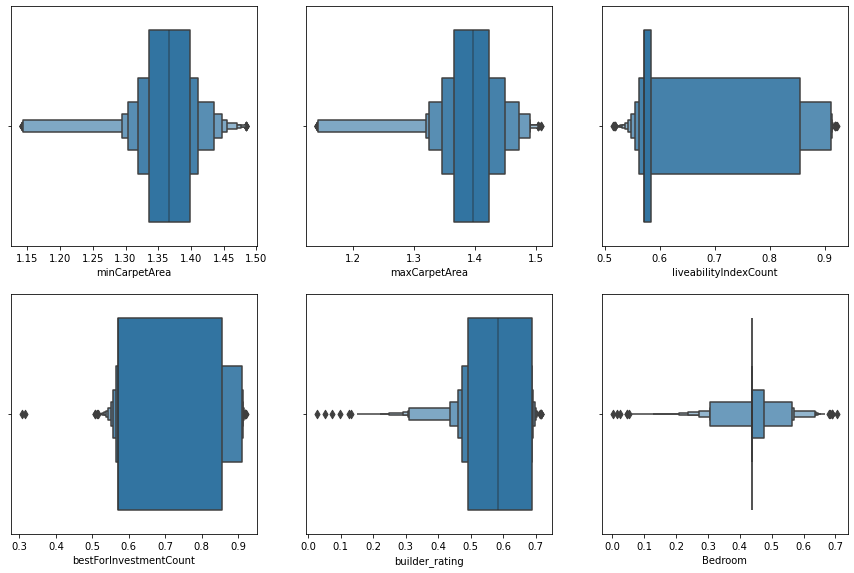

In [102]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sb.boxenplot(x=transformed_data['minCarpetArea'])

plt.subplot(3, 3, 2)
sb.boxenplot(x=transformed_data['maxCarpetArea'])

plt.subplot(3, 3, 3)
sb.boxenplot(x=transformed_data['liveabilityIndexCount'])

plt.subplot(3, 3, 4)
sb.boxenplot(x=transformed_data['bestForInvestmentCount'])

plt.subplot(3, 3, 5)
sb.boxenplot(x=transformed_data['builder_rating'])

plt.subplot(3, 3, 6)
sb.boxenplot(x=transformed_data['Bedroom'])

plt.show()

##### Detection  of outliers 

In [103]:
columns_of_interest= ['bestForInvestmentCount', 'builder_rating', 'Bedroom']

In [104]:
z_scores = combined_df2[columns_of_interest].apply(zscore)

In [105]:
threshold = 5
outliers = np.abs(z_scores) > threshold

In [106]:
outlier_indices = outliers.any(axis=1)

In [107]:
combined_df2[outliers] = np.nan

In [108]:
data_imputed = combined_df2.fillna(combined_df2.mean())

In [109]:
# print("Imputed Data:")
# print(data_imputed.head())

# print("Data with Outliers Removed:")
# print(data_removed.head())

In [110]:
print("Rows with outliers:")
print(transformed_data[outlier_indices])

Rows with outliers:
Empty DataFrame
Columns: [minCarpetArea, maxCarpetArea, liveabilityIndexCount, bestForInvestmentCount, builder_rating, Bedroom, prices]
Index: []


In [111]:
# Select the column of interest
column_of_interest = 'Bedroom'

# Convert the column to a NumPy array
column_data = combined_df2[column_of_interest].values

# Calculate the 25th, 50th, and 75th percentiles
percentiles = np.percentile(column_data, [25, 50, 75])
q1=percentiles[0]
q2=percentiles[1]
q3=percentiles[2]
# Print the calculated percentiles
print("25th Percentile:", q1)
print("50th Percentile (Median):", q2)
print("75th Percentile:", q3)

25th Percentile: 0.0
50th Percentile (Median): 0.8842042469546936
75th Percentile: 2.5


In [112]:
iqr=percentiles[2]-percentiles[0]

In [113]:
IQR=print('Inter-Quantile Range:',iqr)

Inter-Quantile Range: 2.5


In [114]:
factor = 1.5

# Calculate the outlier threshold
threshold = iqr*factor

# Identify outliers
outliers = column_data[(column_data < q1 - threshold) | (column_data > q3 + threshold)]

# Print the outliers
print("Outliers:", outliers)

Outliers: []


## Linear Regression and Polynomial Linear Regression

In [115]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X1_train, y1_train)

LinearRegression()

In [116]:
# y_pred = regressor.predict(X1_test)

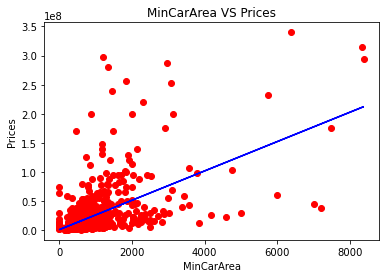

In [117]:
# plt.scatter(X1_train, y1_train, color = 'red')
# plt.plot(X1_train, regressor.predict(X1_train), color = 'blue')
# plt.title('MinCarArea VS Prices')
# plt.xlabel('MinCarArea')
# plt.ylabel('Prices')
# plt.show()

In [118]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree = 3)
# X_poly = poly_reg.fit_transform(X1)
# lin_reg_2 = LinearRegression()
# lin_reg_2.fit(X_poly, y1)

LinearRegression()

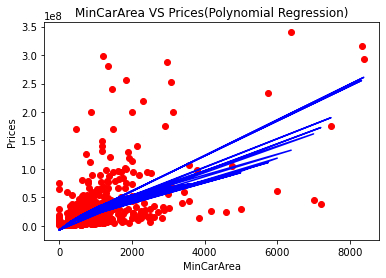

In [119]:
# plt.scatter(X1_train, y1_train, color = 'red')
# plt.plot(X1_train, lin_reg_2.predict(poly_reg.fit_transform(X1_train)), color = 'blue')
# plt.title('MinCarArea VS Prices(Polynomial Regression)')
# plt.xlabel('MinCarArea')
# plt.ylabel('Prices')
# plt.show()

In [120]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X2_train, y2_train)

LinearRegression()

In [121]:
# y_pred = regressor.predict(X2_test)

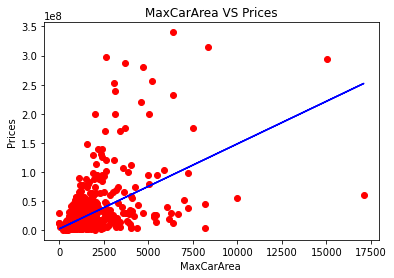

In [122]:
# plt.scatter(X2_train, y2_train, color = 'red')
# plt.plot(X2_train, regressor.predict(X2_train), color = 'blue')
# plt.title('MaxCarArea VS Prices')
# plt.xlabel('MaxCarArea ')
# plt.ylabel('Prices')
# plt.show()

In [123]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree = 3)
# X_poly = poly_reg.fit_transform(X2)
# lin_reg_2 = LinearRegression()
# lin_reg_2.fit(X_poly, y2)

LinearRegression()

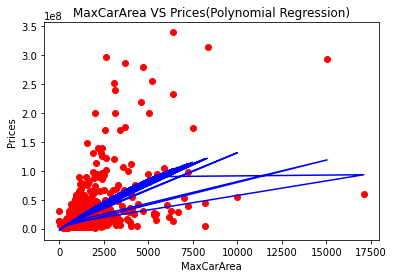

In [124]:
# plt.scatter(X2_train, y2_train, color = 'red')
# plt.plot(X2_train, lin_reg_2.predict(poly_reg.fit_transform(X2_train)), color = 'blue')
# plt.title('MaxCarArea VS Prices(Polynomial Regression)')
# plt.xlabel('MaxCarArea')
# plt.ylabel('Prices')
# plt.show()

## Multiple Linear Regression


In [125]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
# y_pred = regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.27e+07  1.12e+07]
 [ 2.06e+07  2.81e+07]
 [ 5.28e+06  2.66e+06]
 [ 3.24e+07  8.25e+06]
 [ 2.33e+07  1.17e+07]
 [ 1.43e+07  1.58e+07]
 [ 2.22e+07  3.35e+07]
 [ 3.26e+07  3.25e+07]
 [ 7.77e+06  5.65e+06]
 [ 1.76e+07  2.10e+07]
 [ 2.21e+07  3.89e+07]
 [ 1.18e+07  3.90e+06]
 [ 2.05e+07  7.08e+06]
 [ 2.16e+07  2.89e+07]
 [ 5.28e+06  1.05e+07]
 [ 2.62e+07  6.60e+06]
 [ 1.46e+07  7.19e+06]
 [ 1.07e+07  1.27e+07]
 [ 2.66e+07  3.64e+07]
 [ 1.17e+07  7.55e+06]
 [ 2.50e+07  5.74e+07]
 [ 2.91e+07  2.49e+07]
 [ 1.66e+07  2.25e+07]
 [ 2.58e+07  4.00e+07]
 [ 1.14e+07  1.31e+07]
 [ 4.18e+07  5.26e+07]
 [ 1.57e+07  1.05e+07]
 [ 5.18e+07  2.33e+07]
 [ 3.80e+06  7.50e+06]
 [ 1.67e+07  4.73e+06]
 [ 1.58e+07  2.07e+07]
 [ 1.84e+07  1.46e+07]
 [ 2.26e+07  1.90e+07]
 [ 1.03e+07  4.68e+06]
 [ 3.60e+07  5.70e+07]
 [ 2.38e+07  3.44e+07]
 [ 2.46e+07  3.03e+07]
 [ 1.57e+07  4.40e+06]
 [ 6.41e+07  1.05e+08]
 [ 3.23e+07  2.64e+07]
 [ 1.17e+07  1.30e+07]
 [ 1.79e+07  9.60e+06]
 [ 1.24e+08  5.13e+06]
 [ 1.66e+07

In [127]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred)

# # calculate mean squared error
# mse = mean_squared_error(y_test, y_pred)

# # calculate R-squared
# r2 = r2_score(y_test, y_pred)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 14843459.583737466
Mean Squared Error: 985746404000362.1
R-squared: 0.29507002622011336


In [128]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(XD_train, yD_train)

LinearRegression()

In [129]:
# yD_pred = regressor.predict(XD_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((yD_pred.reshape(len(yD_pred),1), yD_test.reshape(len(yD_test),1)),1))

[[ 2.90e+07  1.12e+07]
 [ 1.86e+07  2.81e+07]
 [ 4.86e+06  2.66e+06]
 [ 2.87e+07  8.25e+06]
 [ 2.19e+07  1.17e+07]
 [ 1.94e+07  1.58e+07]
 [ 2.59e+07  3.35e+07]
 [ 3.05e+07  3.25e+07]
 [ 7.22e+06  5.65e+06]
 [ 1.23e+07  2.10e+07]
 [ 1.95e+07  3.89e+07]
 [ 3.88e+06  3.90e+06]
 [ 2.43e+07  7.08e+06]
 [ 2.03e+07  2.89e+07]
 [-1.00e+07  1.05e+07]
 [ 2.93e+07  6.60e+06]
 [ 1.12e+07  7.19e+06]
 [ 5.40e+05  1.27e+07]
 [ 2.99e+07  3.64e+07]
 [ 2.06e+07  7.55e+06]
 [ 2.86e+07  5.74e+07]
 [ 3.14e+07  2.49e+07]
 [ 1.73e+07  2.25e+07]
 [ 3.45e+07  4.00e+07]
 [ 6.96e+06  1.31e+07]
 [ 3.70e+07  5.26e+07]
 [ 1.04e+07  1.05e+07]
 [ 4.48e+07  2.33e+07]
 [-9.51e+06  7.50e+06]
 [ 1.45e+07  4.73e+06]
 [ 1.03e+07  2.07e+07]
 [ 1.86e+07  1.46e+07]
 [ 2.54e+07  1.90e+07]
 [ 7.19e+06  4.68e+06]
 [ 4.19e+07  5.70e+07]
 [ 3.02e+07  3.44e+07]
 [ 2.74e+07  3.03e+07]
 [ 1.39e+07  4.40e+06]
 [ 7.09e+07  1.05e+08]
 [ 2.93e+07  2.64e+07]
 [ 1.77e+07  1.30e+07]
 [ 1.22e+07  9.60e+06]
 [ 9.44e+07  5.13e+06]
 [ 2.00e+07

In [130]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(yD_test, yD_pred)

# # calculate mean squared error
# mse = mean_squared_error(yD_test, yD_pred)

# # calculate R-squared
# r2 = r2_score(yD_test, yD_pred)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 15218741.772088313
Mean Squared Error: 928533699714794.4
R-squared: 0.3359841497393373


In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(XT_train, yT_train)

LinearRegression()

In [132]:
yT_pred = regressor.predict(XT_test)
np.set_printoptions(precision=2)
print(np.concatenate((yT_pred.reshape(len(yT_pred),1), yT_test.reshape(len(yT_test),1)),1))

[[1.66 1.68]
 [1.69 1.65]
 [1.66 1.67]
 ...
 [1.68 1.7 ]
 [1.67 1.66]
 [1.67 1.67]]


In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_MLR = mean_absolute_error(yT_test, yT_pred)

# calculate mean squared error
mse_MLR = mean_squared_error(yT_test, yT_pred)

# calculate R-squared
r2_MLR = r2_score(yT_test, yT_pred)

print("Mean Absolute Error:", mae_MLR)
print("Mean Squared Error:", mse_MLR)
print("R-squared:", r2_MLR)

Mean Absolute Error: 0.011552226836881915
Mean Squared Error: 0.00021369420951836964
R-squared: 0.26393912239013995


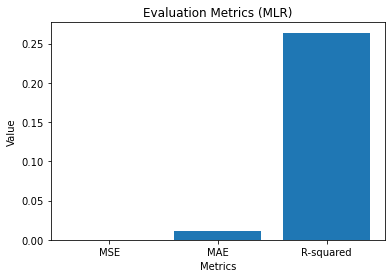

In [134]:
metrics = ['MSE', 'MAE', 'R-squared']
values = [mse_MLR, mae_MLR, r2_MLR]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics (MLR)')
plt.show()

## SVR

In [135]:
# from sklearn.svm import SVR
# svr_regressor = SVR(kernel = 'rbf')
# svr_regressor.fit(X, y)

/Users/parthmody/anaconda3/envs/DL_env/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [136]:
# y_pred = svr_regressor.predict(X)

In [137]:
# y_pred = svr_regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.21e+07 1.12e+07]
 [1.21e+07 2.81e+07]
 [1.21e+07 2.66e+06]
 [1.21e+07 8.25e+06]
 [1.21e+07 1.17e+07]
 [1.21e+07 1.58e+07]
 [1.21e+07 3.35e+07]
 [1.21e+07 3.25e+07]
 [1.21e+07 5.65e+06]
 [1.21e+07 2.10e+07]
 [1.21e+07 3.89e+07]
 [1.21e+07 3.90e+06]
 [1.21e+07 7.08e+06]
 [1.21e+07 2.89e+07]
 [1.21e+07 1.05e+07]
 [1.21e+07 6.60e+06]
 [1.21e+07 7.19e+06]
 [1.21e+07 1.27e+07]
 [1.21e+07 3.64e+07]
 [1.21e+07 7.55e+06]
 [1.21e+07 5.74e+07]
 [1.21e+07 2.49e+07]
 [1.21e+07 2.25e+07]
 [1.21e+07 4.00e+07]
 [1.21e+07 1.31e+07]
 [1.21e+07 5.26e+07]
 [1.21e+07 1.05e+07]
 [1.21e+07 2.33e+07]
 [1.21e+07 7.50e+06]
 [1.21e+07 4.73e+06]
 [1.21e+07 2.07e+07]
 [1.21e+07 1.46e+07]
 [1.21e+07 1.90e+07]
 [1.21e+07 4.68e+06]
 [1.21e+07 5.70e+07]
 [1.21e+07 3.44e+07]
 [1.21e+07 3.03e+07]
 [1.21e+07 4.40e+06]
 [1.21e+07 1.05e+08]
 [1.21e+07 2.64e+07]
 [1.21e+07 1.30e+07]
 [1.21e+07 9.60e+06]
 [1.21e+07 5.13e+06]
 [1.21e+07 1.22e+07]
 [1.21e+07 1.59e+07]
 [1.21e+07 1.55e+07]
 [1.21e+07 1.35e+07]
 [1.21e+07 4.

In [138]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred)

# # calculate mean squared error
# mse = mean_squared_error(y_test, y_pred)

# # calculate R-squared
# r2 = r2_score(y_test, y_pred)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 16719968.422265032
Mean Squared Error: 1543160224724798.8
R-squared: -0.10354944470384986


In [139]:
# from sklearn.svm import SVR
# svr_regressor = SVR(kernel = 'linear')
# svr_regressor.fit(XD_train, yD_train)

SVR(kernel='linear')

In [140]:
# yD_pred = svr_regressor.predict(XD_train)

In [141]:
# yD_pred = svr_regressor.predict(XD_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((yD_pred.reshape(len(yD_pred),1), yD_test.reshape(len(yD_test),1)),1))

[[1.77e+07 1.12e+07]
 [1.39e+07 2.81e+07]
 [9.24e+06 2.66e+06]
 [1.70e+07 8.25e+06]
 [1.24e+07 1.17e+07]
 [8.97e+06 1.58e+07]
 [1.34e+07 3.35e+07]
 [1.93e+07 3.25e+07]
 [1.09e+07 5.65e+06]
 [9.70e+06 2.10e+07]
 [1.54e+07 3.89e+07]
 [9.44e+06 3.90e+06]
 [9.41e+06 7.08e+06]
 [1.48e+07 2.89e+07]
 [1.45e+07 1.05e+07]
 [1.80e+07 6.60e+06]
 [8.99e+06 7.19e+06]
 [7.98e+06 1.27e+07]
 [1.38e+07 3.64e+07]
 [1.21e+07 7.55e+06]
 [1.30e+07 5.74e+07]
 [1.48e+07 2.49e+07]
 [1.33e+07 2.25e+07]
 [1.01e+07 4.00e+07]
 [1.04e+07 1.31e+07]
 [1.99e+07 5.26e+07]
 [8.48e+06 1.05e+07]
 [4.26e+07 2.33e+07]
 [7.16e+06 7.50e+06]
 [6.63e+06 4.73e+06]
 [1.07e+07 2.07e+07]
 [1.01e+07 1.46e+07]
 [9.86e+06 1.90e+07]
 [1.00e+07 4.68e+06]
 [1.81e+07 5.70e+07]
 [1.46e+07 3.44e+07]
 [1.44e+07 3.03e+07]
 [1.48e+07 4.40e+06]
 [3.00e+07 1.05e+08]
 [1.72e+07 2.64e+07]
 [9.35e+06 1.30e+07]
 [1.25e+07 9.60e+06]
 [5.73e+07 5.13e+06]
 [1.17e+07 1.22e+07]
 [1.31e+07 1.59e+07]
 [5.74e+07 1.55e+07]
 [7.38e+06 1.35e+07]
 [1.80e+07 4.

In [142]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(yD_test, yD_pred)

# # calculate mean squared error
# mse = mean_squared_error(yD_test, yD_pred)

# # calculate R-squared
# r2 = r2_score(yD_test, yD_pred)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 15290682.270700155
Mean Squared Error: 1243997355682028.5
R-squared: 0.11038881829605085


In [143]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'poly')
svr_regressor.fit(XT_train, yT_train)

SVR(kernel='poly')

In [144]:
yT_pred = svr_regressor.predict(XT_test)
np.set_printoptions(precision=2)
print(np.concatenate((yT_pred.reshape(len(yT_pred),1), yT_test.reshape(len(yT_test),1)),1))

[[1.67 1.68]
 [1.67 1.65]
 [1.67 1.67]
 ...
 [1.67 1.7 ]
 [1.67 1.66]
 [1.67 1.67]]


In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_SVR = mean_absolute_error(yT_test, yT_pred)

# calculate mean squared error
mse_SVR = mean_squared_error(yT_test, yT_pred)

# calculate R-squared
r2_SVR  = r2_score(yT_test, yT_pred)

print("Mean Absolute Error:", mae_SVR)
print("Mean Squared Error:", mse_SVR)
print("R-squared:", r2_SVR)

Mean Absolute Error: 0.013864421595309382
Mean Squared Error: 0.00029311067098632387
R-squared: -0.009607598676941942


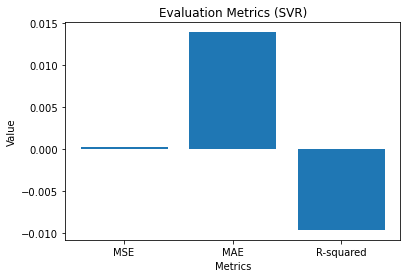

In [146]:
metrics = ['MSE', 'MAE', 'R-squared']
values = [mse_SVR, mae_SVR, r2_SVR]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics (SVR)')
plt.show()

## Decision Tree

In [147]:
# from sklearn.tree import DecisionTreeRegressor
# dt_regressor = DecisionTreeRegressor(random_state = 0)
# dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [148]:
# y_pred = dt_regressor.predict(X)

In [149]:
# y_pred1 = dt_regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[1.02e+07 1.12e+07]
 [2.00e+07 2.81e+07]
 [3.90e+06 2.66e+06]
 [6.50e+07 8.25e+06]
 [4.10e+07 1.17e+07]
 [3.60e+06 1.58e+07]
 [4.53e+07 3.35e+07]
 [2.98e+08 3.25e+07]
 [5.65e+06 5.65e+06]
 [2.10e+07 2.10e+07]
 [2.70e+07 3.89e+07]
 [1.15e+07 3.90e+06]
 [4.33e+06 7.08e+06]
 [3.67e+07 2.89e+07]
 [3.20e+07 1.05e+07]
 [7.10e+06 6.60e+06]
 [6.32e+06 7.19e+06]
 [3.65e+06 1.27e+07]
 [2.85e+07 3.64e+07]
 [6.16e+06 7.55e+06]
 [3.49e+07 5.74e+07]
 [2.52e+07 2.49e+07]
 [1.79e+07 2.25e+07]
 [8.20e+06 4.00e+07]
 [4.02e+06 1.31e+07]
 [7.49e+07 5.26e+07]
 [9.15e+06 1.05e+07]
 [2.78e+07 2.33e+07]
 [2.55e+06 7.50e+06]
 [4.10e+06 4.73e+06]
 [1.90e+07 2.07e+07]
 [7.00e+06 1.46e+07]
 [1.78e+07 1.90e+07]
 [4.30e+06 4.68e+06]
 [3.56e+07 5.70e+07]
 [8.80e+06 3.44e+07]
 [3.04e+07 3.03e+07]
 [4.70e+06 4.40e+06]
 [1.40e+08 1.05e+08]
 [3.98e+07 2.64e+07]
 [1.36e+07 1.30e+07]
 [1.02e+07 9.60e+06]
 [4.72e+06 5.13e+06]
 [3.83e+06 1.22e+07]
 [2.35e+07 1.59e+07]
 [5.29e+07 1.55e+07]
 [7.95e+06 1.35e+07]
 [7.80e+07 4.

In [150]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred1)

# # calculate mean squared error
# mse = mean_squared_error(y_test, y_pred1)

# # calculate R-squared
# r2 = r2_score(y_test, y_pred1)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 15504418.418397626
Mean Squared Error: 1454139337998743.2
R-squared: -0.0398885567807552


In [151]:
# from sklearn.tree import DecisionTreeRegressor
# dt_regressor = DecisionTreeRegressor(random_state = 0)
# dt_regressor.fit(XD_train, yD_train)

DecisionTreeRegressor(random_state=0)

In [152]:
# y_pred = dt_regressor.predict(XD)

In [153]:
# yD_pred = dt_regressor.predict(XD_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((yD_pred.reshape(len(yD_pred),1), yD_test.reshape(len(yD_test),1)),1))

[[3.08e+07 1.12e+07]
 [8.50e+06 2.81e+07]
 [1.05e+07 2.66e+06]
 [1.17e+07 8.25e+06]
 [4.10e+07 1.17e+07]
 [1.60e+07 1.58e+07]
 [2.35e+07 3.35e+07]
 [1.01e+08 3.25e+07]
 [5.65e+06 5.65e+06]
 [1.60e+07 2.10e+07]
 [1.11e+07 3.89e+07]
 [5.50e+06 3.90e+06]
 [1.61e+07 7.08e+06]
 [3.45e+07 2.89e+07]
 [3.45e+07 1.05e+07]
 [4.42e+06 6.60e+06]
 [1.50e+07 7.19e+06]
 [3.65e+06 1.27e+07]
 [2.60e+07 3.64e+07]
 [2.42e+07 7.55e+06]
 [9.25e+06 5.74e+07]
 [2.52e+07 2.49e+07]
 [1.10e+07 2.25e+07]
 [2.14e+07 4.00e+07]
 [7.70e+06 1.31e+07]
 [3.46e+07 5.26e+07]
 [6.10e+06 1.05e+07]
 [1.57e+07 2.33e+07]
 [1.27e+07 7.50e+06]
 [3.01e+06 4.73e+06]
 [2.60e+06 2.07e+07]
 [1.46e+07 1.46e+07]
 [2.50e+07 1.90e+07]
 [1.04e+07 4.68e+06]
 [3.60e+07 5.70e+07]
 [1.95e+07 3.44e+07]
 [3.70e+07 3.03e+07]
 [2.98e+06 4.40e+06]
 [1.40e+08 1.05e+08]
 [5.64e+06 2.64e+07]
 [1.36e+07 1.30e+07]
 [1.69e+07 9.60e+06]
 [4.72e+06 5.13e+06]
 [6.05e+06 1.22e+07]
 [9.70e+06 1.59e+07]
 [2.00e+07 1.55e+07]
 [7.95e+06 1.35e+07]
 [7.80e+07 4.

In [154]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, yD_pred)

# # calculate mean squared error
# mse = mean_squared_error(y_test, yD_pred)

# # calculate R-squared
# r2 = r2_score(y_test, yD_pred)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 14772366.970326409
Mean Squared Error: 1074104721414174.8
R-squared: 0.23188295688363625


In [155]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(XT_train,yT_train)

DecisionTreeRegressor(random_state=0)

In [156]:
yT_pred = dt_regressor.predict(XT_test)
np.set_printoptions(precision=2)
print(np.concatenate((yT_pred.reshape(len(yT_pred),1), yT_test.reshape(len(yT_test),1)),1))

[[1.68 1.68]
 [1.65 1.65]
 [1.67 1.67]
 ...
 [1.7  1.7 ]
 [1.66 1.66]
 [1.67 1.67]]


In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_DT = mean_absolute_error(yT_test, yT_pred)

# calculate mean squared error
mse_DT = mean_squared_error(yT_test, yT_pred)

# calculate R-squared
r2_DT = r2_score(yT_test, yT_pred)

print("Mean Absolute Error:", mae_DT)
print("Mean Squared Error:", mse_DT)
print("R-squared:", r2_DT)

Mean Absolute Error: 0.0016646745903844543
Mean Squared Error: 3.433165347115682e-05
R-squared: 0.8817460377577288


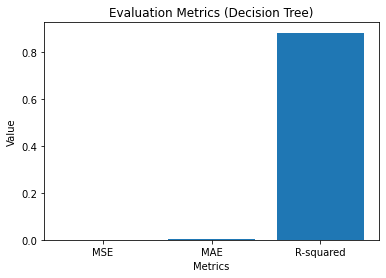

In [158]:
metrics = ['MSE', 'MAE', 'R-squared']
values = [mse_DT, mae_DT, r2_DT]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics (Decision Tree)')
plt.show()

## Random Forest

In [159]:
# from sklearn.ensemble import RandomForestRegressor
# rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# rf_regressor.fit(X_train, y_train)

<ipython-input-159-946cd212942c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [160]:
# y_pred = rf_regressor.predict(X)

In [161]:
# y_pred2 = rf_regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[9.18e+06 1.12e+07]
 [2.12e+07 2.81e+07]
 [4.82e+06 2.66e+06]
 [3.25e+07 8.25e+06]
 [3.17e+07 1.17e+07]
 [8.32e+06 1.58e+07]
 [1.52e+07 3.35e+07]
 [1.11e+08 3.25e+07]
 [5.65e+06 5.65e+06]
 [2.34e+07 2.10e+07]
 [2.70e+07 3.89e+07]
 [8.19e+06 3.90e+06]
 [1.03e+07 7.08e+06]
 [2.97e+07 2.89e+07]
 [2.71e+07 1.05e+07]
 [8.48e+06 6.60e+06]
 [1.47e+07 7.19e+06]
 [5.22e+06 1.27e+07]
 [2.43e+07 3.64e+07]
 [5.58e+06 7.55e+06]
 [2.30e+07 5.74e+07]
 [2.41e+07 2.49e+07]
 [1.66e+07 2.25e+07]
 [1.18e+07 4.00e+07]
 [5.79e+06 1.31e+07]
 [9.07e+07 5.26e+07]
 [7.57e+06 1.05e+07]
 [2.96e+07 2.33e+07]
 [5.87e+06 7.50e+06]
 [6.81e+06 4.73e+06]
 [1.19e+07 2.07e+07]
 [1.55e+07 1.46e+07]
 [2.17e+07 1.90e+07]
 [6.73e+06 4.68e+06]
 [3.76e+07 5.70e+07]
 [2.10e+07 3.44e+07]
 [2.30e+07 3.03e+07]
 [6.28e+06 4.40e+06]
 [1.17e+08 1.05e+08]
 [3.36e+07 2.64e+07]
 [1.14e+07 1.30e+07]
 [1.78e+07 9.60e+06]
 [3.58e+07 5.13e+06]
 [1.23e+07 1.22e+07]
 [2.08e+07 1.59e+07]
 [4.26e+07 1.55e+07]
 [8.47e+06 1.35e+07]
 [6.85e+07 4.

In [162]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred2)

# # calculate mean squared error
# mse = mean_squared_error(y_test, y_pred2)

# # calculate R-squared
# r2 = r2_score(y_test, y_pred2)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 12427643.045987
Mean Squared Error: 770481412248978.6
R-squared: 0.4490109834229098


In [163]:
# from sklearn.ensemble import RandomForestRegressor
# rf_regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
# rf_regressor.fit(XD_train, yD_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [164]:
# yD_pred = regressor.predict(XD)

In [165]:
# yD_pred

array([3.08e+07, 8.50e+06, 1.05e+07, 1.17e+07, 4.10e+07, 1.60e+07,
       2.35e+07, 1.01e+08, 5.65e+06, 1.60e+07, 1.11e+07, 5.50e+06,
       1.61e+07, 3.45e+07, 3.45e+07, 4.42e+06, 1.50e+07, 3.65e+06,
       2.60e+07, 2.42e+07, 9.25e+06, 2.52e+07, 1.10e+07, 2.14e+07,
       7.70e+06, 3.46e+07, 6.10e+06, 1.57e+07, 1.27e+07, 3.01e+06,
       2.60e+06, 1.46e+07, 2.50e+07, 1.04e+07, 3.60e+07, 1.95e+07,
       3.70e+07, 2.98e+06, 1.40e+08, 5.64e+06, 1.36e+07, 1.69e+07,
       4.72e+06, 6.05e+06, 9.70e+06, 2.00e+07, 7.95e+06, 7.80e+07,
       7.87e+07, 7.20e+07, 9.63e+06, 3.98e+07, 2.47e+07, 1.55e+07,
       1.92e+07, 1.59e+07, 7.87e+07, 2.50e+07, 2.02e+07, 1.40e+07,
       1.53e+07, 4.19e+07, 1.77e+07, 3.53e+06, 7.18e+06, 1.74e+07,
       2.69e+07, 1.52e+07, 9.60e+06, 1.60e+07, 2.33e+07, 2.90e+07,
       1.17e+07, 3.09e+06, 5.84e+06, 1.10e+07, 5.54e+07, 3.34e+07,
       4.09e+06, 4.50e+06, 5.19e+06, 1.40e+07, 3.70e+06, 1.70e+08,
       7.19e+06, 1.14e+07, 1.42e+07, 1.80e+07, 8.90e+07, 4.75e

In [166]:
# yD_pred2 = rf_regressor.predict(XD_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((yD_pred2.reshape(len(yD_pred2),1), yD_test.reshape(len(yD_test),1)),1))

[[3.59e+07 1.12e+07]
 [1.51e+07 2.81e+07]
 [7.83e+06 2.66e+06]
 [1.86e+07 8.25e+06]
 [3.11e+07 1.17e+07]
 [9.67e+06 1.58e+07]
 [2.04e+07 3.35e+07]
 [6.88e+07 3.25e+07]
 [5.65e+06 5.65e+06]
 [1.86e+07 2.10e+07]
 [1.21e+07 3.89e+07]
 [5.78e+06 3.90e+06]
 [1.14e+07 7.08e+06]
 [2.21e+07 2.89e+07]
 [6.31e+06 1.05e+07]
 [1.05e+07 6.60e+06]
 [1.21e+07 7.19e+06]
 [5.66e+06 1.27e+07]
 [2.21e+07 3.64e+07]
 [1.11e+07 7.55e+06]
 [1.92e+07 5.74e+07]
 [2.57e+07 2.49e+07]
 [1.54e+07 2.25e+07]
 [1.39e+07 4.00e+07]
 [8.47e+06 1.31e+07]
 [7.65e+07 5.26e+07]
 [7.93e+06 1.05e+07]
 [4.95e+07 2.33e+07]
 [6.13e+06 7.50e+06]
 [6.94e+06 4.73e+06]
 [5.38e+06 2.07e+07]
 [1.42e+07 1.46e+07]
 [2.12e+07 1.90e+07]
 [6.18e+06 4.68e+06]
 [5.37e+07 5.70e+07]
 [2.20e+07 3.44e+07]
 [2.45e+07 3.03e+07]
 [1.46e+07 4.40e+06]
 [6.00e+07 1.05e+08]
 [2.40e+07 2.64e+07]
 [1.32e+07 1.30e+07]
 [1.59e+07 9.60e+06]
 [6.15e+07 5.13e+06]
 [1.09e+07 1.22e+07]
 [1.52e+07 1.59e+07]
 [2.62e+07 1.55e+07]
 [9.32e+06 1.35e+07]
 [6.20e+07 4.

In [167]:
# from sklearn.metrics import r2_score

# # calculate R-squared
# r2 = r2_score(yD_test, yD_pred2)

# print("R-squared:", r2)

R-squared: 0.37652429922372965


In [168]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
rf_regressor.fit(XT_train, yT_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [169]:
yT_pred = rf_regressor.predict(XT_test)
np.set_printoptions(precision=2)
print(np.concatenate((yT_pred.reshape(len(yT_pred),1), yT_test.reshape(len(yT_test),1)),1))

[[1.68 1.68]
 [1.65 1.65]
 [1.66 1.67]
 ...
 [1.69 1.7 ]
 [1.66 1.66]
 [1.67 1.67]]


In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_RT = mean_absolute_error(yT_test, yT_pred)

# calculate mean squared error
mse_RT = mean_squared_error(yT_test, yT_pred)

# calculate R-squared
r2_RT = r2_score(yT_test, yT_pred)

print("Mean Absolute Error:", mae_RT)
print("Mean Squared Error:", mse_RT)
print("R-squared:", r2_RT)

Mean Absolute Error: 0.0018694797220660236
Mean Squared Error: 2.349550692781305e-05
R-squared: 0.9190706969170919


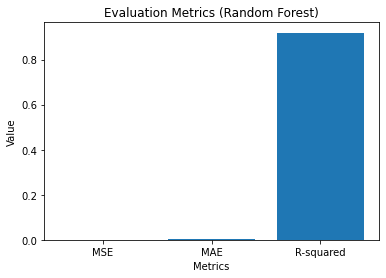

In [171]:
metrics = ['MSE', 'MAE', 'R-squared']
values = [mse_RT, mae_RT, r2_RT]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics (Random Forest)')
plt.show()

## XGBoost

In [172]:
# import xgboost as xgb
# xgb_regressor = xgb.XGBRegressor()
# xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [173]:
# y_pred = xgb_regressor.predict(X_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[9.18e+06 1.12e+07]
 [2.12e+07 2.81e+07]
 [4.82e+06 2.66e+06]
 [3.25e+07 8.25e+06]
 [3.17e+07 1.17e+07]
 [8.32e+06 1.58e+07]
 [1.52e+07 3.35e+07]
 [1.11e+08 3.25e+07]
 [5.65e+06 5.65e+06]
 [2.34e+07 2.10e+07]
 [2.70e+07 3.89e+07]
 [8.19e+06 3.90e+06]
 [1.03e+07 7.08e+06]
 [2.97e+07 2.89e+07]
 [2.71e+07 1.05e+07]
 [8.48e+06 6.60e+06]
 [1.47e+07 7.19e+06]
 [5.22e+06 1.27e+07]
 [2.43e+07 3.64e+07]
 [5.58e+06 7.55e+06]
 [2.30e+07 5.74e+07]
 [2.41e+07 2.49e+07]
 [1.66e+07 2.25e+07]
 [1.18e+07 4.00e+07]
 [5.79e+06 1.31e+07]
 [9.07e+07 5.26e+07]
 [7.57e+06 1.05e+07]
 [2.96e+07 2.33e+07]
 [5.87e+06 7.50e+06]
 [6.81e+06 4.73e+06]
 [1.19e+07 2.07e+07]
 [1.55e+07 1.46e+07]
 [2.17e+07 1.90e+07]
 [6.73e+06 4.68e+06]
 [3.76e+07 5.70e+07]
 [2.10e+07 3.44e+07]
 [2.30e+07 3.03e+07]
 [6.28e+06 4.40e+06]
 [1.17e+08 1.05e+08]
 [3.36e+07 2.64e+07]
 [1.14e+07 1.30e+07]
 [1.78e+07 9.60e+06]
 [3.58e+07 5.13e+06]
 [1.23e+07 1.22e+07]
 [2.08e+07 1.59e+07]
 [4.26e+07 1.55e+07]
 [8.47e+06 1.35e+07]
 [6.85e+07 4.

In [174]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred)

# # calculate mean squared error
# mse = mean_squared_error(y_test, y_pred)

# # calculate R-squared
# r2 = r2_score(yT_test, yT_pred)

# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

Mean Absolute Error: 13228158.506166544
Mean Squared Error: 961682297788694.8
R-squared: 0.9190706969170919


In [175]:
# import xgboost as xgb
# xgb_regressor = xgb.XGBRegressor()
# xgb_regressor.fit(XD_train, yD_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [176]:
# yD_pred2 = xgb_regressor.predict(XD_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((yD_pred2.reshape(len(yD_pred2),1), yD_test.reshape(len(yD_test),1)),1))

[[ 4.54e+07  1.12e+07]
 [ 1.67e+07  2.81e+07]
 [ 8.56e+06  2.66e+06]
 [ 1.72e+07  8.25e+06]
 [ 3.42e+07  1.17e+07]
 [ 1.65e+07  1.58e+07]
 [ 2.59e+07  3.35e+07]
 [ 7.62e+07  3.25e+07]
 [ 6.60e+06  5.65e+06]
 [ 2.24e+07  2.10e+07]
 [ 4.63e+06  3.89e+07]
 [ 9.35e+06  3.90e+06]
 [ 1.28e+07  7.08e+06]
 [ 2.26e+07  2.89e+07]
 [-1.01e+06  1.05e+07]
 [ 1.17e+07  6.60e+06]
 [ 1.51e+07  7.19e+06]
 [ 4.77e+06  1.27e+07]
 [ 2.10e+07  3.64e+07]
 [ 9.51e+06  7.55e+06]
 [ 2.84e+07  5.74e+07]
 [ 2.64e+07  2.49e+07]
 [ 1.34e+07  2.25e+07]
 [ 1.29e+07  4.00e+07]
 [ 9.13e+06  1.31e+07]
 [ 3.33e+07  5.26e+07]
 [ 8.58e+06  1.05e+07]
 [ 6.54e+07  2.33e+07]
 [ 7.26e+06  7.50e+06]
 [ 5.17e+06  4.73e+06]
 [ 4.96e+06  2.07e+07]
 [ 1.23e+07  1.46e+07]
 [ 1.62e+07  1.90e+07]
 [ 6.69e+06  4.68e+06]
 [ 4.84e+07  5.70e+07]
 [ 2.01e+07  3.44e+07]
 [ 2.20e+07  3.03e+07]
 [ 8.49e+06  4.40e+06]
 [ 7.71e+07  1.05e+08]
 [ 2.82e+07  2.64e+07]
 [ 1.10e+07  1.30e+07]
 [ 1.31e+07  9.60e+06]
 [ 4.44e+07  5.13e+06]
 [ 7.98e+06

In [177]:
# from sklearn.metrics import r2_score

# # calculate R-squared
# r2 = r2_score(yD_test, yD_pred2)

# print("R-squared:", r2)

R-squared: 0.08672759739389457


In [178]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(XT_train, yT_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [179]:
yT_pred = xgb_regressor.predict(XT_test)
np.set_printoptions(precision=2)
print(np.concatenate((yT_pred.reshape(len(yT_pred),1), yT_test.reshape(len(yT_test),1)),1))

[[1.68 1.68]
 [1.65 1.65]
 [1.66 1.67]
 ...
 [1.7  1.7 ]
 [1.66 1.66]
 [1.67 1.67]]


In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_XG = mean_absolute_error(yT_test, yT_pred)

# calculate mean squared error
mse_XG = mean_squared_error(yT_test, yT_pred)

# calculate R-squared
r2_XG = r2_score(yT_test, yT_pred)

print("Mean Absolute Error:", mae_XG)
print("Mean Squared Error:", mse_XG)
print("R-squared:", r2_XG)

Mean Absolute Error: 0.002532012816759059
Mean Squared Error: 2.6470070389296424e-05
R-squared: 0.9088249359444368


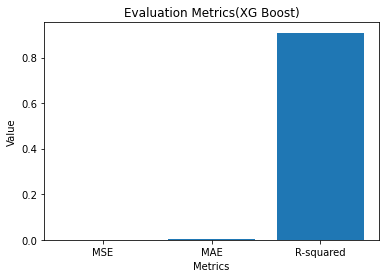

In [181]:
metrics = ['MSE', 'MAE', 'R-squared']
values = [mse_XG, mae_XG, r2_XG]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics(XG Boost)')
plt.show()

# Note:-
The evaluation metrics used is mse, mae and r-squared the optimal value for mae, mse should be close to zero and the optimal value for r-squared should be close to 1.

### df:- Original data frame
### df_2:- Upsampled data frame
### combined_df2:- Combined the original data with the augmented data (mainly done to increase the sample size)
### transformed_data:- Transformed the combined data to remove negative, infinite values.